In [22]:
import os
import re
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Oulu data

In [37]:
oulu_train_data = []
oulu_train_glasses = []
oulu_test_data = []
oulu_test_glasses = []
with open('../data/txt/train_oulu.txt', 'r') as f:
    for line in f:
        oulu_train_data.append(line.strip())
with open('../data/txt/test_oulu.txt', 'r') as f:
    for line in f:
        oulu_test_data.append(line.strip())
with open('../data/txt/train_oulu_glass.txt', 'r') as f:
    for line in f:
        oulu_train_glasses.append(line.strip())
with open('../data/txt/test_oulu_glass.txt', 'r') as f:
    for line in f:
        oulu_test_glasses.append(line.strip())

In [24]:
lab = {0: 'Happy', 1: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Sad', 5:'Surprise'}
listvalue = list(lab.values())
listvalue

['Happy', 'Angry', 'Disgust', 'Fear', 'Sad', 'Surprise']

In [25]:
def report_pred(datafold, eval_fold, listvalue):
    num = 0
    label_fold = []
    pred_fold = []
    for i in eval_fold:
        data = i.split(", ")
        label = int(data[0][-1])
        pred = int(data[1][-1])
        label_fold.append(label)
        pred_fold.append(pred)
    for i in range(len(datafold)):
        label = int(label_fold[i])
        pred = int(pred_fold[i])
        tf = label == pred
        if not tf:
            print(f'{datafold[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
            num += 1
    print(f'Number of wrong predictions: {num}')
    return label_fold, pred_fold
        

## model pred score (normal eval data)

In [26]:
print(oulu_test_data)

['Angry/VL_P001_D_A Angry', 'Angry/VL_P001_S_A Angry', 'Angry/VL_P001_W_A Angry', 'Angry/VL_P003_D_A Angry', 'Angry/VL_P003_S_A Angry', 'Angry/VL_P003_W_A Angry', 'Angry/VL_P005_D_A Angry', 'Angry/VL_P005_S_A Angry', 'Angry/VL_P005_W_A Angry', 'Angry/VL_P009_D_A Angry', 'Angry/VL_P009_S_A Angry', 'Angry/VL_P009_W_A Angry', 'Angry/VL_P011_D_A Angry', 'Angry/VL_P011_S_A Angry', 'Angry/VL_P011_W_A Angry', 'Angry/VL_P016_D_A Angry', 'Angry/VL_P016_S_A Angry', 'Angry/VL_P016_W_A Angry', 'Angry/VL_P017_D_A Angry', 'Angry/VL_P017_S_A Angry', 'Angry/VL_P017_W_A Angry', 'Angry/VL_P018_D_A Angry', 'Angry/VL_P018_S_A Angry', 'Angry/VL_P018_W_A Angry', 'Angry/VL_P019_D_A Angry', 'Angry/VL_P019_S_A Angry', 'Angry/VL_P019_W_A Angry', 'Angry/VL_P022_D_A Angry', 'Angry/VL_P022_S_A Angry', 'Angry/VL_P022_W_A Angry', 'Angry/VL_P025_D_A Angry', 'Angry/VL_P025_S_A Angry', 'Angry/VL_P025_W_A Angry', 'Angry/VL_P033_D_A Angry', 'Angry/VL_P033_S_A Angry', 'Angry/VL_P033_W_A Angry', 'Angry/VL_P036_D_A Angry', 

In [27]:
eval_normal_oulu = []
with open('../log/oulu_model/oulu_val_fan_oulu_train_date_15-Mar-2024-04-24-17.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_normal_oulu.append(line.strip())
print(eval_normal_oulu)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 0', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 0', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [28]:
eval_normal_oulu_label, eval_normal_oulu_pred = report_pred(oulu_test_data, eval_normal_oulu, listvalue)

Angry/VL_P003_W_A Angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
Angry/VL_P005_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P005_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P005_W_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P009_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P009_W_A Angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
Angry/VL_P011_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P011_W_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P016_D_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P016_S_A Angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
Angry/VL_P018_D_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P018_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P018_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P050_D_A Angry, La

classification report

In [29]:
print(classification_report(eval_normal_oulu_label, eval_normal_oulu_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.72      0.87      0.79        71
       Angry       0.59      0.74      0.65        72
     Disgust       0.72      0.61      0.66        72
        Fear       0.71      0.54      0.61        72
         Sad       0.68      0.68      0.68        71
    Surprise       0.90      0.83      0.86        72

    accuracy                           0.71       430
   macro avg       0.72      0.71      0.71       430
weighted avg       0.72      0.71      0.71       430



## loss

In [31]:
epochs = []
train_loss = []
val_loss = []
with open("../log/oulu_model/oulu_loss_fan_train_70_30_date_13-Mar-2024-06-04-43.txt", "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss.append(float(temp[0]))
print(epochs)
print(train_loss)
print(val_loss)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
[1.6114, 1.2839, 1.044, 0.8702, 0.736, 0.6303, 0.547, 0.4769, 0.4202, 0.3704, 0.3279, 0.2884, 0.2588, 0.2297, 0.2075, 0.1855, 0.165, 0.1486, 0.1326, 0.1195, 0.1074, 0.0966, 0.0874, 0.08, 0.0708, 0.0638, 0.0603

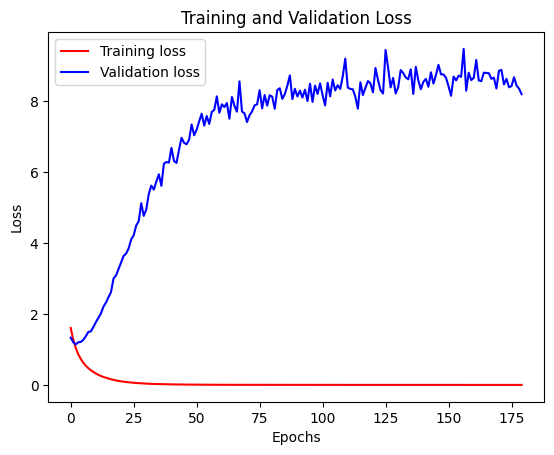

In [32]:
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## glass data

### eval

In [33]:
print(oulu_test_glasses)

['Angry/VL_P001_S_A Angry', 'Angry/VL_P001_W_A Angry', 'Angry/VL_P003_S_A Angry', 'Angry/VL_P003_W_A Angry', 'Angry/VL_P005_S_A Angry', 'Angry/VL_P005_W_A Angry', 'Angry/VL_P009_S_A Angry', 'Angry/VL_P011_S_A Angry', 'Angry/VL_P016_D_A Angry', 'Angry/VL_P016_S_A Angry', 'Angry/VL_P016_W_A Angry', 'Angry/VL_P017_D_A Angry', 'Angry/VL_P017_S_A Angry', 'Angry/VL_P018_D_A Angry', 'Angry/VL_P018_S_A Angry', 'Angry/VL_P019_D_A Angry', 'Angry/VL_P019_S_A Angry', 'Angry/VL_P019_W_A Angry', 'Angry/VL_P022_S_A Angry', 'Angry/VL_P022_W_A Angry', 'Angry/VL_P025_S_A Angry', 'Angry/VL_P033_D_A Angry', 'Angry/VL_P033_S_A Angry', 'Angry/VL_P033_W_A Angry', 'Angry/VL_P036_S_A Angry', 'Angry/VL_P036_W_A Angry', 'Angry/VL_P042_D_A Angry', 'Angry/VL_P042_S_A Angry', 'Angry/VL_P042_W_A Angry', 'Angry/VL_P046_S_A Angry', 'Angry/VL_P046_W_A Angry', 'Angry/VL_P047_S_A Angry', 'Angry/VL_P047_W_A Angry', 'Angry/VL_P050_S_A Angry', 'Angry/VL_P050_W_A Angry', 'Angry/VL_P051_D_A Angry', 'Angry/VL_P051_S_A Angry', 

In [34]:
eval_glass_oulu = []
with open('../log/oulu_model/oulu_glass_val_fan_oulu_train_date_15-Mar-2024-04-50-16.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_glass_oulu.append(line.strip())
print(eval_glass_oulu)

['Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, P

In [35]:
eval_glass_oulu_label, eval_glass_oulu_pred = report_pred(oulu_test_glasses, eval_glass_oulu, listvalue)

Angry/VL_P001_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P003_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P005_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P005_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P011_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P016_D_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P016_W_A Angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
Angry/VL_P018_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P019_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P022_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P033_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P042_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P046_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_

In [36]:
print(classification_report(eval_glass_oulu_label, eval_glass_oulu_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.76      0.84      0.80        57
       Angry       0.51      0.66      0.57        56
     Disgust       0.36      0.57      0.44        54
        Fear       0.91      0.34      0.49        59
         Sad       0.65      0.45      0.53        62
    Surprise       0.85      0.85      0.85        55

    accuracy                           0.62       343
   macro avg       0.67      0.62      0.62       343
weighted avg       0.68      0.62      0.61       343



### train

#### normal

In [38]:
print(oulu_train_data)

['Angry/VL_P002_D_A Angry', 'Angry/VL_P002_S_A Angry', 'Angry/VL_P002_W_A Angry', 'Angry/VL_P004_D_A Angry', 'Angry/VL_P004_S_A Angry', 'Angry/VL_P004_W_A Angry', 'Angry/VL_P006_D_A Angry', 'Angry/VL_P006_S_A Angry', 'Angry/VL_P006_W_A Angry', 'Angry/VL_P007_D_A Angry', 'Angry/VL_P007_S_A Angry', 'Angry/VL_P007_W_A Angry', 'Angry/VL_P008_D_A Angry', 'Angry/VL_P008_S_A Angry', 'Angry/VL_P008_W_A Angry', 'Angry/VL_P010_D_A Angry', 'Angry/VL_P010_S_A Angry', 'Angry/VL_P010_W_A Angry', 'Angry/VL_P012_D_A Angry', 'Angry/VL_P012_S_A Angry', 'Angry/VL_P012_W_A Angry', 'Angry/VL_P013_D_A Angry', 'Angry/VL_P013_S_A Angry', 'Angry/VL_P013_W_A Angry', 'Angry/VL_P014_D_A Angry', 'Angry/VL_P014_S_A Angry', 'Angry/VL_P014_W_A Angry', 'Angry/VL_P015_D_A Angry', 'Angry/VL_P015_S_A Angry', 'Angry/VL_P015_W_A Angry', 'Angry/VL_P020_D_A Angry', 'Angry/VL_P020_S_A Angry', 'Angry/VL_P020_W_A Angry', 'Angry/VL_P021_D_A Angry', 'Angry/VL_P021_S_A Angry', 'Angry/VL_P021_W_A Angry', 'Angry/VL_P023_D_A Angry', 

In [39]:
eval_train_oulu = []
with open('../log/oulu_model/oulu_train_eval_fan_oulu_train_date_15-Mar-2024-04-52-11.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_train_oulu.append(line.strip())
print(eval_train_oulu)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [41]:
print("normal oulu train data")
eval_train_oulu_label, eval_train_oulu_pred = report_pred(oulu_train_data, eval_train_oulu, listvalue)

normal oulu train data
Number of wrong predictions: 0


In [42]:
print(classification_report(eval_train_oulu_label, eval_train_oulu_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00       168
       Angry       1.00      1.00      1.00       166
     Disgust       1.00      1.00      1.00       167
        Fear       1.00      1.00      1.00       168
         Sad       1.00      1.00      1.00       166
    Surprise       1.00      1.00      1.00       168

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



#### glass

In [43]:
print(oulu_train_glasses)

['Angry/VL_P002_D_A Angry', 'Angry/VL_P002_S_A Angry', 'Angry/VL_P002_W_A Angry', 'Angry/VL_P004_S_A Angry', 'Angry/VL_P004_W_A Angry', 'Angry/VL_P006_S_A Angry', 'Angry/VL_P006_W_A Angry', 'Angry/VL_P007_D_A Angry', 'Angry/VL_P007_S_A Angry', 'Angry/VL_P008_D_A Angry', 'Angry/VL_P008_S_A Angry', 'Angry/VL_P008_W_A Angry', 'Angry/VL_P010_S_A Angry', 'Angry/VL_P012_S_A Angry', 'Angry/VL_P013_S_A Angry', 'Angry/VL_P013_W_A Angry', 'Angry/VL_P014_D_A Angry', 'Angry/VL_P014_S_A Angry', 'Angry/VL_P015_D_A Angry', 'Angry/VL_P015_S_A Angry', 'Angry/VL_P015_W_A Angry', 'Angry/VL_P020_D_A Angry', 'Angry/VL_P020_S_A Angry', 'Angry/VL_P020_W_A Angry', 'Angry/VL_P021_S_A Angry', 'Angry/VL_P021_W_A Angry', 'Angry/VL_P023_S_A Angry', 'Angry/VL_P023_W_A Angry', 'Angry/VL_P024_S_A Angry', 'Angry/VL_P026_S_A Angry', 'Angry/VL_P026_W_A Angry', 'Angry/VL_P027_S_A Angry', 'Angry/VL_P028_S_A Angry', 'Angry/VL_P029_S_A Angry', 'Angry/VL_P029_W_A Angry', 'Angry/VL_P030_S_A Angry', 'Angry/VL_P030_W_A Angry', 

In [46]:
eval_train_glass_oulu = []
with open('../log/oulu_model/oulu_train_glass_eval_fan_oulu_train_date_15-Mar-2024-04-53-57.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_train_glass_oulu.append(line.strip())
print(eval_train_glass_oulu)

['Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, P

In [47]:
print("glass oulu train data")
eval_train_glass_oulu_label, eval_train_glass_oulu_pred = report_pred(oulu_train_glasses, eval_train_glass_oulu, listvalue)

glass oulu train data
Angry/VL_P002_D_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P004_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P006_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P008_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P013_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P015_D_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P015_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P020_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P020_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P021_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P023_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P026_W_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P028_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Corr

In [48]:
print(classification_report(eval_train_glass_oulu_label, eval_train_glass_oulu_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.92      0.88      0.90       139
       Angry       0.65      0.80      0.72       136
     Disgust       0.54      0.91      0.68       137
        Fear       0.99      0.58      0.73       140
         Sad       0.80      0.46      0.58       140
    Surprise       0.91      0.90      0.90       137

    accuracy                           0.75       829
   macro avg       0.80      0.76      0.75       829
weighted avg       0.80      0.75      0.75       829



# Rav

In [49]:
rav_data = []
with open('../data/txt/all_ravdess_ck.txt', 'r') as f:
    for line in f:
        rav_data.append(line.strip())
print(rav_data)


['angry/02-01-05-01-01-01-01 angry', 'angry/02-01-05-01-01-01-03 angry', 'angry/02-01-05-01-01-01-04 angry', 'angry/02-01-05-01-01-01-06 angry', 'angry/02-01-05-01-01-01-07 angry', 'angry/02-01-05-01-01-01-08 angry', 'angry/02-01-05-01-01-01-09 angry', 'angry/02-01-05-01-01-01-11 angry', 'angry/02-01-05-01-01-01-13 angry', 'angry/02-01-05-01-01-01-15 angry', 'angry/02-01-05-01-01-01-16 angry', 'angry/02-01-05-01-01-01-17 angry', 'angry/02-01-05-01-01-01-18 angry', 'angry/02-01-05-01-01-01-19 angry', 'angry/02-01-05-01-01-01-20 angry', 'angry/02-01-05-01-01-01-21 angry', 'angry/02-01-05-01-01-01-22 angry', 'angry/02-01-05-01-01-01-24 angry', 'angry/02-01-05-01-01-02-01 angry', 'angry/02-01-05-01-01-02-02 angry', 'angry/02-01-05-01-01-02-04 angry', 'angry/02-01-05-01-01-02-06 angry', 'angry/02-01-05-01-01-02-08 angry', 'angry/02-01-05-01-01-02-09 angry', 'angry/02-01-05-01-01-02-10 angry', 'angry/02-01-05-01-01-02-12 angry', 'angry/02-01-05-01-01-02-14 angry', 'angry/02-01-05-01-01-02-15

## normal

In [50]:
eval_rav_data = []
with open('../log/oulu_model/rav_all_eval_fan_oulu_train_date_15-Mar-2024-04-57-15.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_rav_data.append(line.strip())
print(eval_rav_data)

['Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, Pred: 0', 'Label: 1, Pred: 3', 'Label: 1, Pred: 0', 'Label: 1, Pred: 0', 'Label: 1, Pred: 3', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 0', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, Pred: 3', 'Label: 1, P

In [51]:
eval_rav_data_label, eval_rav_data_pred = report_pred(rav_data, eval_rav_data, listvalue)

angry/02-01-05-01-01-01-01 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-01-01-04 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-06 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-01-01-07 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-01-01-08 angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
angry/02-01-05-01-01-01-09 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-11 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-01-01-13 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-01-01-15 angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
angry/02-01-05-01-01-01-16 angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
angry/02-01-05-01-01-01-18 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-19 angry, Label: 1 (Angry), Pred: 2 (Disgust)

In [52]:
print(classification_report(eval_rav_data_label, eval_rav_data_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.54      0.97      0.70       376
       Angry       0.29      0.05      0.09       376
     Disgust       0.30      0.79      0.44       192
        Fear       0.41      0.37      0.39       376
         Sad       0.74      0.04      0.07       376
    Surprise       0.28      0.42      0.34       192

    accuracy                           0.41      1888
   macro avg       0.43      0.44      0.34      1888
weighted avg       0.45      0.41      0.33      1888



## glass

In [53]:
eval_rav_glass = []
with open('../log/oulu_model/rav_allglass_eval_fan_oulu_train_date_15-Mar-2024-05-02-25.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_rav_glass.append(line.strip())
print(eval_rav_glass)

['Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 3', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 0', 'Label: 1, Pred: 0', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 3', 'Label: 1, Pred: 3', 'Label: 1, P

In [54]:
eval_rav_glass_label, eval_rav_glass_pred = report_pred(rav_data, eval_rav_glass, listvalue)

angry/02-01-05-01-01-01-01 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-04 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-06 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-07 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-08 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-09 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-11 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-13 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-15 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-16 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-17 angry, Label: 1 (Angry), Pred: 0 (Happy), Correct: False
angry/02-01-05-01-01-01-18 angry, Label: 1 (Angry), Pre

In [55]:
print(classification_report(eval_rav_glass_label, eval_rav_glass_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.58      0.96      0.72       376
       Angry       0.18      0.01      0.01       376
     Disgust       0.57      0.69      0.62       192
        Fear       0.35      0.22      0.27       376
         Sad       0.80      0.03      0.06       376
    Surprise       0.14      0.58      0.23       192

    accuracy                           0.37      1888
   macro avg       0.44      0.41      0.32      1888
weighted avg       0.45      0.37      0.30      1888



# CK (no contempt)

In [56]:
ck_data = []
with open('../data/txt/all_ck_nocontemp.txt', 'r') as f:
    for line in f:
        ck_data.append(line.strip())
print(ck_data)


['S130/007 Angry', 'S501/001 Angry', 'S005/001 Disgust', 'S035/005 Disgust', 'S054/004 Disgust', 'S074/004 Disgust', 'S106/004 Disgust', 'S116/006 Disgust', 'S130/012 Disgust', 'S054/002 Fear', 'S074/001 Fear', 'S084/002 Fear', 'S501/004 Fear', 'S035/006 Happy', 'S064/003 Happy', 'S074/005 Happy', 'S094/004 Happy', 'S106/006 Happy', 'S116/007 Happy', 'S130/013 Happy', 'S064/004 Sad', 'S106/002 Sad', 'S130/009 Sad', 'S501/006 Sad', 'S035/001 Surprise', 'S054/003 Surprise', 'S064/001 Surprise', 'S074/002 Surprise', 'S084/001 Surprise', 'S094/001 Surprise', 'S116/001 Surprise', 'S130/001 Surprise', 'S010/004 Angry', 'S037/003 Angry', 'S055/004 Angry', 'S075/008 Angry', 'S117/006 Angry', 'S502/001 Angry', 'S055/003 Disgust', 'S065/005 Disgust', 'S075/005 Disgust', 'S085/004 Disgust', 'S095/006 Disgust', 'S107/005 Disgust', 'S131/010 Disgust', 'S055/006 Fear', 'S065/002 Fear', 'S117/003 Fear', 'S502/004 Fear', 'S010/006 Happy', 'S037/006 Happy', 'S055/005 Happy', 'S065/004 Happy', 'S075/006

## normal

In [57]:
eval_ck_data = []
with open('../log/oulu_model/allckplusdata_nocontemp_fan_oulu_train_date_15-Mar-2024-16-20-11.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_ck_data.append(line.strip())
print(eval_ck_data)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 3', 'Label: 3, Pred: 3', 'Label: 3, Pred: 0', 'Label: 3, Pred: 4', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 4, Pred: 1', 'Label: 4, Pred: 1', 'Label: 4, Pred: 1', 'Label: 4, Pred: 1', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 3', 'Label: 3, Pred: 3', 'Label: 3, P

In [58]:
eval_ck_data_label, eval_ck_data_pred = report_pred(ck_data, eval_ck_data, listvalue)

S084/002 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S501/004 Fear, Label: 3 (Fear), Pred: 4 (Sad), Correct: False
S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S106/002 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S501/006 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S117/006 Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
S065/005 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S075/005 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S117/003 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S042/004 Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
S132/003 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S042/002 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S503/006 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S504/001 Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
S506/001 Angry, Label: 1 (Angr

In [59]:
print(classification_report(eval_ck_data_label, eval_ck_data_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.96      1.00      0.98        69
       Angry       0.72      0.84      0.78        45
     Disgust       0.88      0.90      0.89        59
        Fear       0.90      0.72      0.80        25
         Sad       0.80      0.71      0.75        28
    Surprise       1.00      0.95      0.98        83

    accuracy                           0.90       309
   macro avg       0.88      0.85      0.86       309
weighted avg       0.90      0.90      0.90       309



## glass

In [60]:
eval_ck_glass = []
with open('../log/oulu_model/allckplusglassdata_nocontemp_fan_oulu_train_date_15-Mar-2024-16-17-08.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_ck_glass.append(line.strip())
print(eval_ck_glass)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 3', 'Label: 3, Pred: 3', 'Label: 3, Pred: 0', 'Label: 3, Pred: 4', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 4, Pred: 1', 'Label: 4, Pred: 4', 'Label: 4, Pred: 2', 'Label: 4, Pred: 4', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 5, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 1', 'Label: 2, Pred: 4', 'Label: 3, Pred: 3', 'Label: 3, Pred: 3', 'Label: 3, P

In [61]:
eval_ck_glass_label, eval_ck_glass_pred = report_pred(ck_data, eval_ck_glass, listvalue)

S084/002 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S501/004 Fear, Label: 3 (Fear), Pred: 4 (Sad), Correct: False
S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S130/009 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False
S010/004 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S117/006 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S107/005 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S131/010 Disgust, Label: 2 (Disgust), Pred: 4 (Sad), Correct: False
S011/004 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S042/004 Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
S119/008 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S132/003 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S042/002 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False
S014/003 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S504/001 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S098/003 Disgust, Label: 2 (Di

In [62]:
print(classification_report(eval_ck_glass_label, eval_ck_glass_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.92      1.00      0.96        69
       Angry       0.79      0.69      0.74        45
     Disgust       0.90      0.76      0.83        59
        Fear       0.86      0.76      0.81        25
         Sad       0.53      0.82      0.65        28
    Surprise       1.00      0.96      0.98        83

    accuracy                           0.86       309
   macro avg       0.84      0.83      0.83       309
weighted avg       0.88      0.86      0.87       309

